# Figure 1

In [1]:
import os
import pickle
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydune.beach import Profile
from pydune.support import data_support as ds
from pydune.support import classifier_support as cs

In [66]:
# Plotting Paramaters
params = {'legend.fontsize': 14,
           'axes.labelsize': 16,
           'axes.labelweight': 'bold',
           'axes.titlesize': 16,
           'axes.titleweight': 'bold',
           'xtick.labelsize': 16,
           'ytick.labelsize': 16,
           'mathtext.default':'regular'}
plt.rcParams.update(params)

In [5]:
# Load some test data of 200 profiles
with open('../../../example/test_profiles.pkl', 'rb') as f:
    data = pickle.load(f)
x, z, toe = data['x'], data['z'], data['toe']

In [77]:
# Instantiate Profile class
p = Profile(x, z)
# Make predictions of dune toe
toe_ml, prob_ml = p.predict_dunetoe_ml('barrier_island_clf', dune_crest='rr', window_size=101, threshold=0.97)
toe_mc = p.predict_dunetoe_mc(dune_crest='rr', window_size=101, threshold=0.97)
toe_rr = p.predict_dunetoe_rr(dune_crest='rr', window_size=101, threshold=0.97, toe_threshold=0.2, verbose=False)
toe_pd = p.predict_dunetoe_pd(dune_crest='rr', window_size=101, threshold=0.97)
# Predict dune crest
crest = p.predict_dunecrest(method='rr', window_size=101, threshold=0.98)
# Predict shoreline
shoreline = p.predict_shoreline()

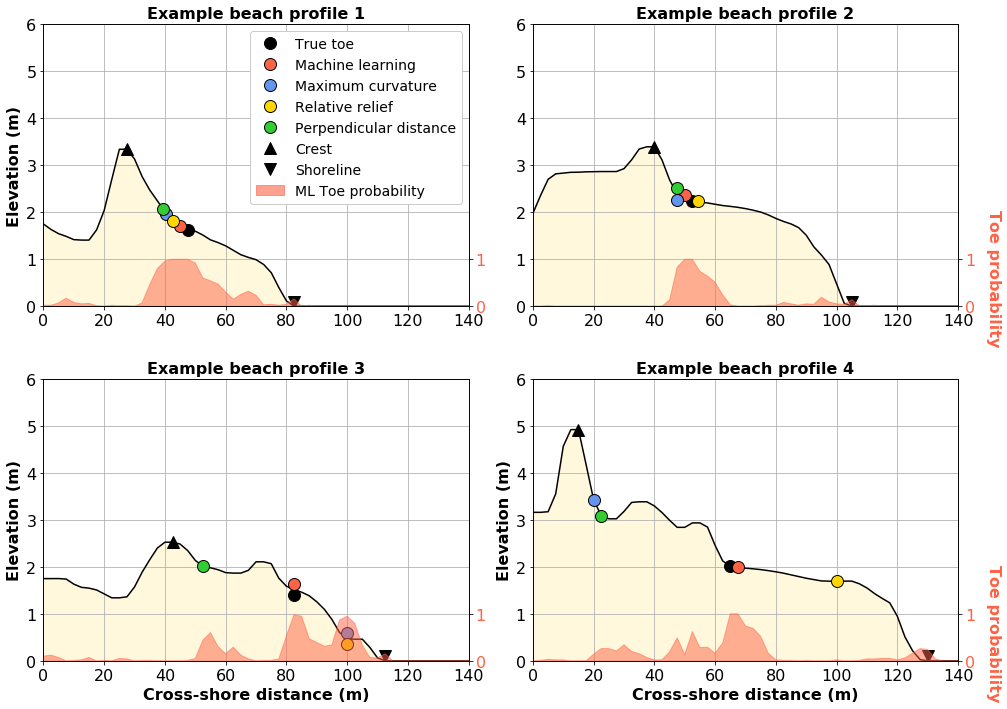

In [115]:
# Figure metadata
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
labels = ['True toe', 'Machine learning', 'Maximum curvature', 'Relative relief', 'Perpendicular distance']
colors = ['k', 'tomato', 'cornflowerblue', 'gold', 'limegreen']
# AXES[0, 0]
n = 0
toes = [toe[n], toe_ml[n], toe_mc[n], toe_rr[n], toe_pd[n]]
jitter_x = [0, 2.3, -2, -2.5, -3.2]
jitter_z = [0, -0.11, 0.15, 0.11, 0.25]
axes[0, 0].plot(x, z[n], '-k')
axes[0, 0].fill_between([70, 100], [0, 0], y2=-1, color='lightskyblue', alpha=0.5)
axes[0, 0].fill_between(x, z[n], y2=-1, color='cornsilk', alpha=1)
axes[0, 0].axvspan(-10, -9, color='tomato', alpha = 0.6, label='ML Toe probability') # legend placeholder
for i, itoe in enumerate(toes): 
    axes[0, 0].plot(x[itoe] + jitter_x[i], z[n, itoe] + jitter_z[i],
                    'o', color=colors[i], ms=12, mec='k', label=labels[i])
axes[0, 0].plot(x[crest[n]], z[n, crest[n]], '^', color='k', ms=12, mec='k', label='Crest')
axes[0, 0].plot(x[shoreline[n]], z[n, shoreline[n]]+0.1, 'v', color='k', ms=12, mec='k', label='Shoreline')
axes[0, 0].set_xlim(220, 360)
axes[0, 0].set_xticklabels(np.arange(0, 141, 20))
axes[0, 0].set_ylim(0, 6)
axes[0, 0].set_title('Example beach profile 1')
# axes[0, 0].set_xlabel('Cross-shore distance (m)')
axes[0, 0].set_ylabel('Elevation (m)')
axes[0, 0].grid()
axes[0, 0].legend(framealpha=1)
# Plot dune toe ML probability
axes2 = axes[0, 0].twinx() 
axes2.fill_between(x, prob_ml[n], color='tomato', alpha=0.5)
axes2.set_ylim(0, 6)
axes2.set_yticks([0, 1])
axes2.tick_params(axis='y', labelcolor='tomato')
axes2.yaxis.set_label_coords(1.1, 0.1)
# axes2.set_ylabel('Toe probability', color='tomato', rotation=270)

# AXES[0, 1]
n = 32
toes = [toe[n], toe_ml[n], toe_mc[n], toe_rr[n], toe_pd[n]]
jitter_x = [0, 0, 0, 2, 0]
jitter_z = [0, 0.1, -0.12, 0, 0.12]
axes[0, 1].plot(x, z[n], '-k')
axes[0, 1].fill_between([70, 100], [0, 0], y2=-1, color='lightskyblue', alpha=0.5)
axes[0, 1].fill_between(x, z[n], y2=-1, color='cornsilk', alpha=1)
axes[0, 1].axvspan(-10, -9, color='tomato', alpha = 0.6, label='ML Toe probability') # legend placeholder
for i, itoe in enumerate(toes): 
    axes[0, 1].plot(x[itoe] + jitter_x[i], z[n, itoe] + jitter_z[i],
                    'o', color=colors[i], ms=12, mec='k', label=labels[i])
axes[0, 1].plot(x[crest[n]], z[n, crest[n]], '^', color='k', ms=12, mec='k', label='Crest')
axes[0, 1].plot(x[shoreline[n]], z[n, shoreline[n]]+0.1, 'v', color='k', ms=12, mec='k', label='Shoreline')
axes[0, 1].set_xlim(360, 500)
axes[0, 1].set_xticklabels(np.arange(0, 141, 20))
axes[0, 1].set_ylim(0, 6)
axes[0, 1].set_title('Example beach profile 2')
# axes[0, 1].set_xlabel('Cross-shore distance (m)')
# axes[0, 1].set_ylabel('Elevation (m)')
axes[0, 1].grid()
# axes[0, 1].legend(framealpha=1)
# Plot dune toe ML probability
axes2 = axes[0, 1].twinx() 
axes2.fill_between(x, prob_ml[n], color='tomato', alpha=0.5)
axes2.set_ylim(0, 6)
axes2.set_yticks([0, 1])
axes2.tick_params(axis='y', labelcolor='tomato')
axes2.yaxis.set_label_coords(1.1, 0.1)
axes2.set_ylabel('Toe probability', color='tomato', rotation=270)

# AXES[1, 0]
n = 10
toes = [toe[n], toe_ml[n], toe_mc[n], toe_rr[n], toe_pd[n]]
jitter_x = [0, 0, 0, 0, 0]
jitter_z = [-0.12, 0.12, 0.12, -0.12, 0]
axes[1, 0].plot(x, z[n], '-k')
axes[1, 0].fill_between([70, 100], [0, 0], y2=-1, color='lightskyblue', alpha=0.5)
axes[1, 0].fill_between(x, z[n], y2=-1, color='cornsilk', alpha=1)
axes[1, 0].axvspan(-10, -9, color='tomato', alpha = 0.6, label='ML Toe probability') # legend placeholder
for i, itoe in enumerate(toes): 
    axes[1, 0].plot(x[itoe] + jitter_x[i], z[n, itoe] + jitter_z[i],
                    'o', color=colors[i], ms=12, mec='k', label=labels[i])
axes[1, 0].plot(x[crest[n]], z[n, crest[n]], '^', color='k', ms=12, mec='k', label='Crest')
axes[1, 0].plot(x[shoreline[n]], z[n, shoreline[n]]+0.1, 'v', color='k', ms=12, mec='k', label='Shoreline')
axes[1, 0].set_xlim(220, 360)
axes[1, 0].set_xticklabels(np.arange(0, 141, 20))
axes[1, 0].set_ylim(0, 6)
axes[1, 0].set_title('Example beach profile 3')
axes[1, 0].set_xlabel('Cross-shore distance (m)')
axes[1, 0].set_ylabel('Elevation (m)')
axes[1, 0].grid()
# axes[1, 0].legend(framealpha=1)
# Plot dune toe ML probability
axes2 = axes[1, 0].twinx() 
axes2.fill_between(x, prob_ml[n], color='tomato', alpha=0.5)
axes2.set_ylim(0, 6)
axes2.set_yticks([0, 1])
axes2.tick_params(axis='y', labelcolor='tomato')
axes2.yaxis.set_label_coords(1.1, 0.1)
# axes2.set_ylabel('Toe probability', color='tomato', rotation=270)

# AXES[1, 1]
n = 19
toes = [toe[n], toe_ml[n], toe_mc[n], toe_rr[n], toe_pd[n]]
axes[1, 1].plot(x, z[n], '-k')
axes[1, 1].fill_between([70, 100], [0, 0], y2=-1, color='lightskyblue', alpha=0.5)
axes[1, 1].fill_between(x, z[n], y2=-1, color='cornsilk', alpha=1)
axes[1, 1].axvspan(-10, -9, color='tomato', alpha = 0.6, label='ML Toe probability') # legend placeholder
for i, itoe in enumerate(toes): 
    axes[1, 1].plot(x[itoe], z[n, itoe],
                    'o', color=colors[i], ms=12, mec='k', label=labels[i])
axes[1, 1].plot(x[crest[n]], z[n, crest[n]], '^', color='k', ms=12, mec='k', label='Crest')
axes[1, 1].plot(x[shoreline[n]], z[n, shoreline[n]]+0.1, 'v', color='k', ms=12, mec='k', label='Shoreline')
axes[1, 1].set_xlim(200, 340)
axes[1, 1].set_xticklabels(np.arange(0, 141, 20))
axes[1, 1].set_ylim(0, 6)
axes[1, 1].set_title('Example beach profile 4')
axes[1, 1].set_xlabel('Cross-shore distance (m)')
axes[1, 1].set_ylabel('Elevation (m)')
axes[1, 1].grid()
# axes[1, 1].legend(framealpha=1)
# Plot dune toe ML probability
axes2 = axes[1, 1].twinx() 
axes2.fill_between(x, prob_ml[n], color='tomato', alpha=0.5)
axes2.set_ylim(0, 6)
axes2.set_yticks([0, 1])
axes2.tick_params(axis='y', labelcolor='tomato')
axes2.yaxis.set_label_coords(1.1, 0.1)
axes2.set_ylabel('Toe probability', color='tomato', rotation=270);
plt.tight_layout()

In [116]:
fig.savefig('../figure_1.png', dpi=300)